In [1]:
import pandas as pd

In [2]:
urls_data = pd.read_csv("url_dataset.csv")

In [3]:
urls_data.head(10)

,protocol,domain_name,address,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,abnormal_url,web_traffic,domain_registration_length,age_of_domain,dns_record,statistical_report
0,http,www.liquidgeneration.com,NaN,0,0,0,0,0,0,0,1,1,2,1,1,1,0
1,http,www.onlineanime.org,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1,1
2,http,www.ceres.dti.ne.jp,~nekoi/senno/senfirst.html,0,0,0,0,1,0,0,1,1,0,1,1,1,0
3,http,www.galeon.com,kmh/,0,0,0,0,0,0,0,1,1,0,1,1,1,0
4,http,www.fanworkrecs.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1,0
5,http,www.animehouse.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1,1
6,http,www2.117.ne.jp,~mb1996ax/enadc.html,0,0,0,0,2,0,0,1,1,2,1,1,1,0
7,http,archive.rhps.org,fritters/yui/index.html,0,0,0,0,0,0,0,1,1,2,1,1,1,0
8,http,www.freecartoonsex.com,NaN,0,0,0,0,0,0,1,1,1,2,1,1,1,0
9,http,www.cutepet.org,NaN,0,0,0,0,0,0,0,1,1,2,1,1,1,0


In [4]:
urls_data.columns

Index(['protocol', 'domain_name', 'address', 'long_url', 'having_@_symbol',
       'redirection_//_symbol', 'prefix_suffix_seperation', 'sub_domains',
       'having_ip_address', 'shortening_service', 'https_token',
       'abnormal_url', 'web_traffic', 'domain_registration_length',
       'age_of_domain', 'dns_record', 'statistical_report'],
      dtype='object')

In [5]:
urls = urls_data.drop(urls_data.columns[[0,1,2]],axis=1)

In [6]:
x_axis = urls.drop('statistical_report',axis=1)
x_axis.columns
y_axis = urls['statistical_report']


In [7]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(x_axis, y_axis, test_size=0.20, random_state=100)

In [8]:
train_test=len(data_train),len(data_test),len(labels_train),len(labels_test)

print(train_test)

(1496, 375, 1496, 375)


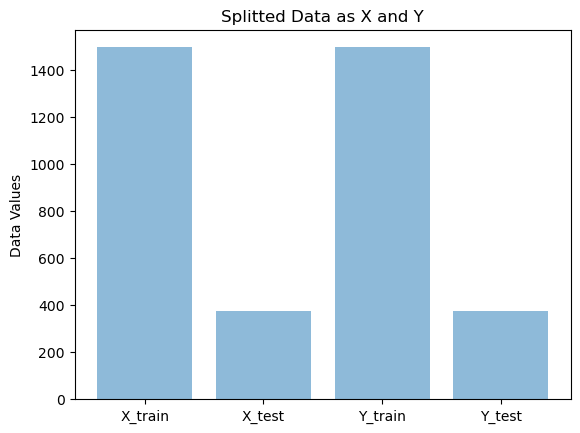

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('X_train', 'X_test', 'Y_train', 'Y_test')
y_pos = np.arange(len(objects))
performance = train_test
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Data Values')
plt.title('Splitted Data as X and Y')
 
plt.show()

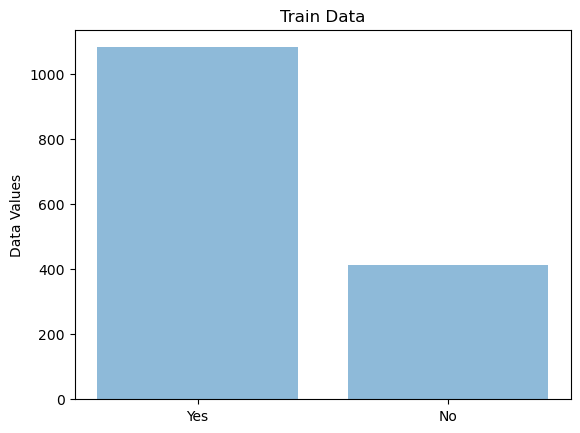

In [10]:
train_data=labels_train.value_counts()

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Yes', 'No')
y_pos = np.arange(len(objects))
performance = train_data
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Data Values')
plt.title('Train Data')
 
plt.show()

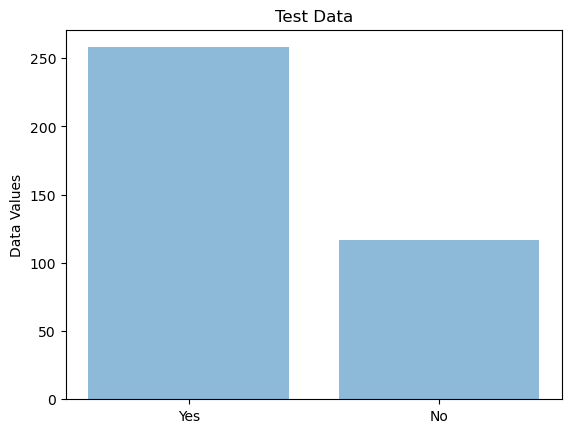

In [11]:
test_data=labels_test.value_counts()

objects = ('Yes', 'No')
y_pos = np.arange(len(objects))
performance = test_data
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Data Values')
plt.title('Test Data')
 
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(data_train,labels_train)

DecisionTreeClassifier()

In [13]:
pred_label = model.predict(data_test)

In [14]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(labels_test,pred_label)
print(cm)
dt_result=accuracy_score(labels_test,pred_label)
print (dt_result)

[[240  18]
 [ 66  51]]
0.776


In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()
rf_classifier.fit(data_train,labels_train)
prediction_res=rf_classifier.predict(data_test)
cm_1=confusion_matrix(labels_test,prediction_res)
print(cm_1)
rf_result=accuracy_score(labels_test,prediction_res)
print (rf_result)

[[239  19]
 [ 65  52]]
0.776


In [16]:
from sklearn.linear_model import LogisticRegression
lr_classifier=LogisticRegression()
lr_classifier.fit(data_train,labels_train)
prediction_res=lr_classifier.predict(data_test)
cm_2=confusion_matrix(labels_test,prediction_res)
print(cm_2)
lr_result=accuracy_score(labels_test,prediction_res)
print (lr_result)

[[242  16]
 [ 71  46]]
0.768


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(data_train,labels_train)
predict_res=knn_classifier.predict(data_test)
cm_3=confusion_matrix(labels_test,prediction_res)
print(cm_3)
knn_result=accuracy_score(labels_test,predict_res)
print (knn_result)

[[242  16]
 [ 71  46]]
0.6986666666666667


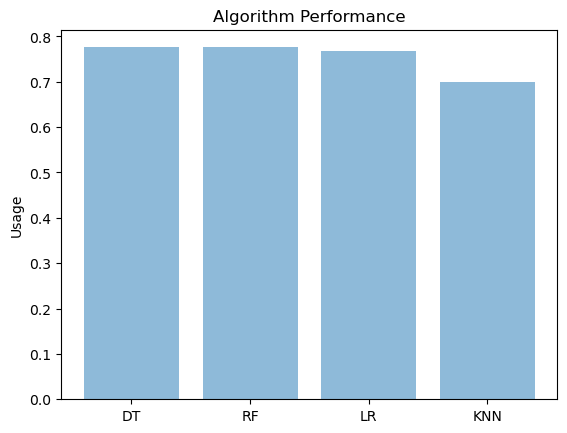

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('DT', 'RF', 'LR', 'KNN')
y_pos = np.arange(len(objects))
performance = [dt_result,rf_result,lr_result,knn_result]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Algorithm Performance')

plt.show()